In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("Iris.csv")

In [5]:
import seaborn as sns

<Axes: xlabel='Species', ylabel='count'>

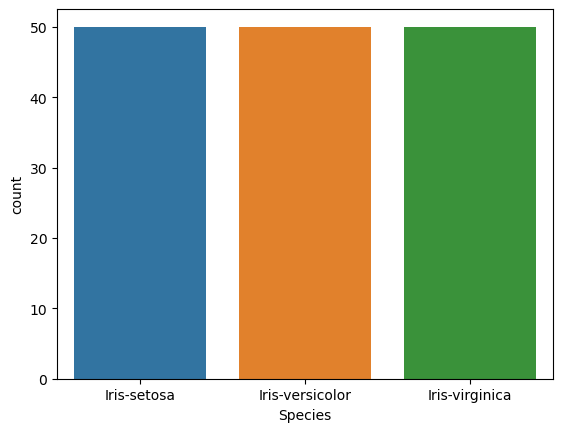

In [7]:
sns.countplot(x='Species',data=df)

In [9]:
target= df['Species']
df = df.drop('Species',axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size =0.20,random_state=12)

X_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
17,18,5.1,3.5,1.4,0.3
81,82,5.5,2.4,3.7,1.0
103,104,6.3,2.9,5.6,1.8
33,34,5.5,4.2,1.4,0.2
101,102,5.8,2.7,5.1,1.9


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [19]:
from sklearn.metrics import classification_report


In [21]:
y_predict= model.predict(X_test)

In [23]:
y_actual=y_test
y_predict

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [25]:
print(classification_report(y_actual,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<Axes: >

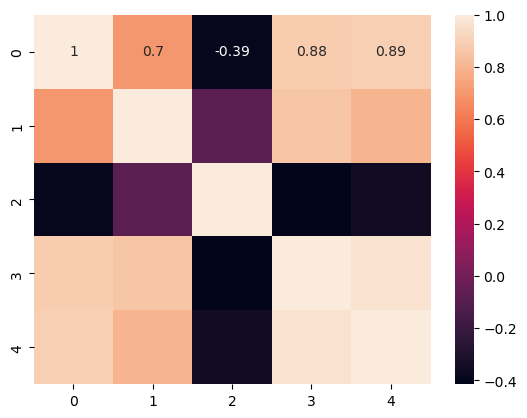

In [27]:
sns.heatmap(X_train.corr(),annot=True)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [33]:
lda = LDA(n_components=2)
tr_comp = lda.fit_transform(X_train, y_train)  # note: LDA needs labels
ts_comp = lda.transform(X_test)


In [35]:
lda_model = LogisticRegression()
lda_model.fit(tr_comp, y_train)


LogisticRegression()

In [37]:
y_predict = lda_model.predict(ts_comp)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



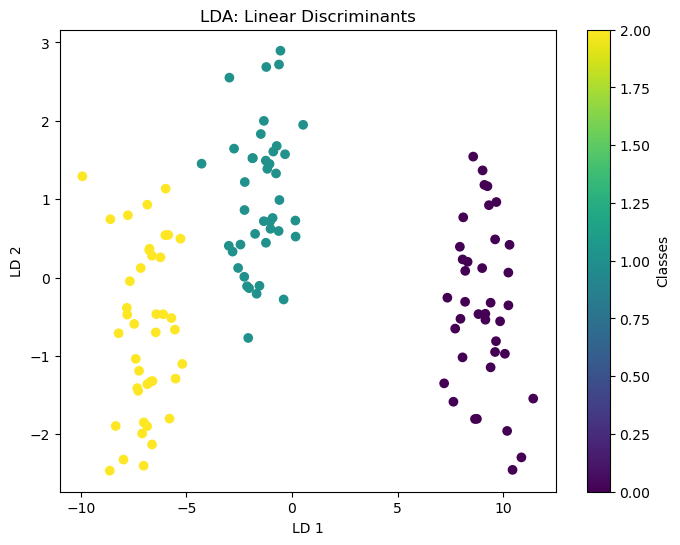

In [39]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

plt.figure(figsize=(8, 6))
sc = plt.scatter(tr_comp[:, 0], tr_comp[:, 1], c=y_encoded, cmap='viridis')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title('LDA: Linear Discriminants')
plt.colorbar(sc, label='Classes')
plt.show()

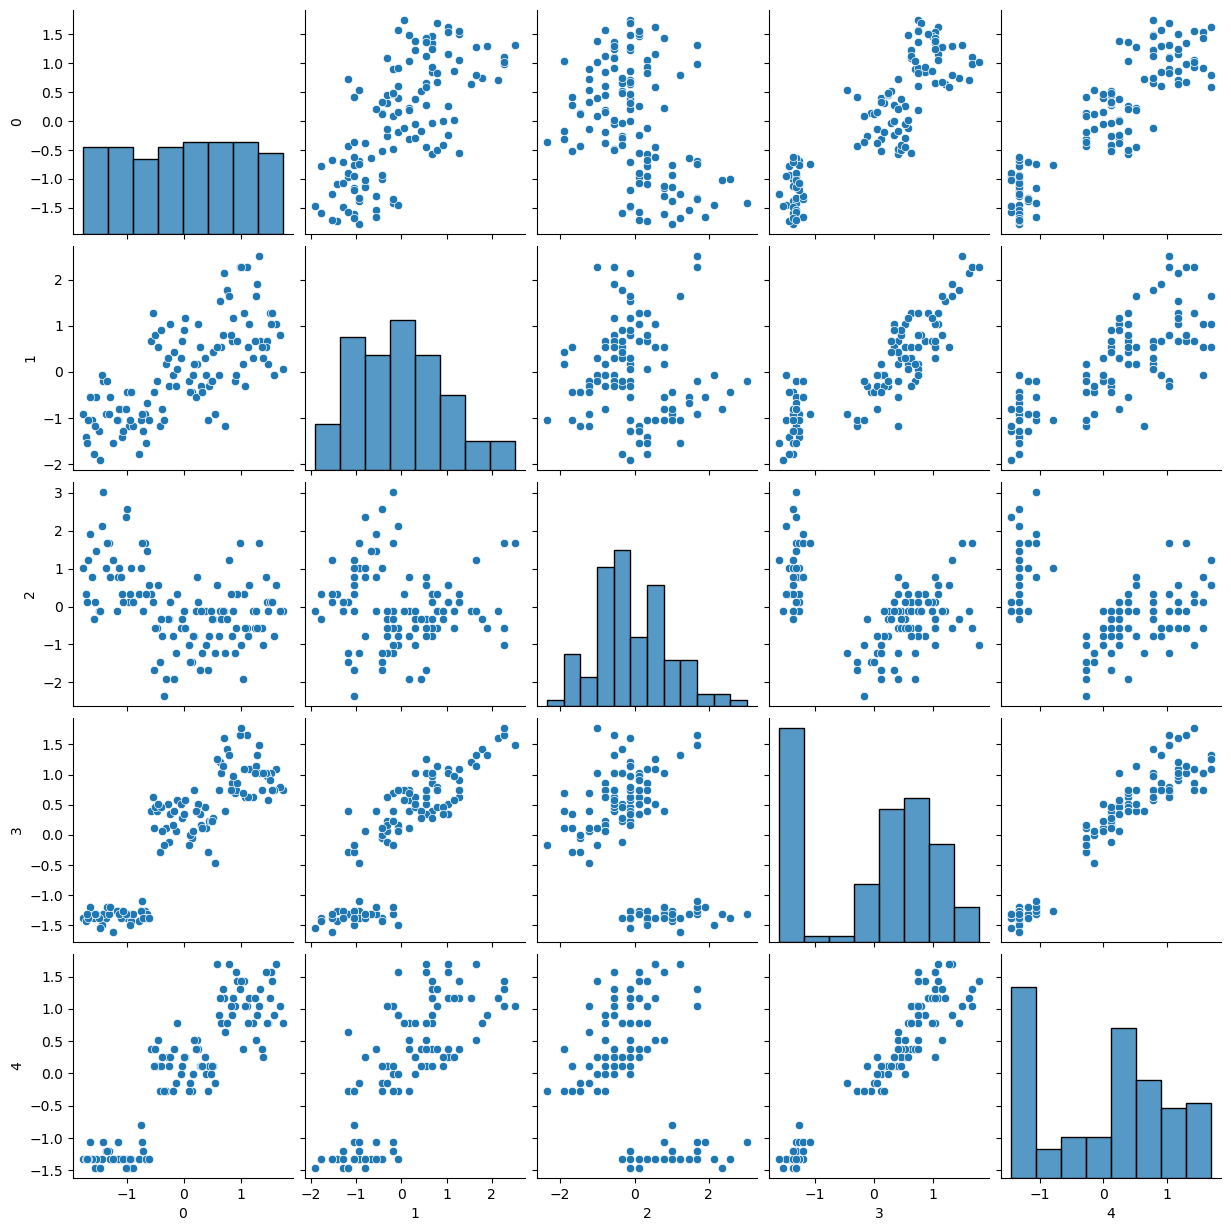

In [45]:
sns.pairplot(X_train)